# K-Mean Lab
- Saranpat Funkaew, 58070501068
-  Chatthong Rimthong, 58070501011

## Lab Instruction 

In this lab, you are to cluster a 2-feature dataset by using K-mean clustering algorithm. <br>
The data file is`xclara.csv` <br>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

### 1. Load the data set and explore

In [11]:
df = pd.read_csv("xclara.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
V1    3000 non-null float64
V2    3000 non-null float64
dtypes: float64(2)
memory usage: 47.0 KB


### 2. Cluster the preprocessed data with K-mean clustering with 5 clusters

In [23]:
from sklearn import preprocessing 
X_train_scaled = preprocessing.scale(df)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5) 
kmeans.fit(X_train_scaled) 
labels = kmeans.predict(X_train_scaled)
sse = kmeans.inertia_
centroids = kmeans.cluster_centers_

### 3. Visualize the cluster result

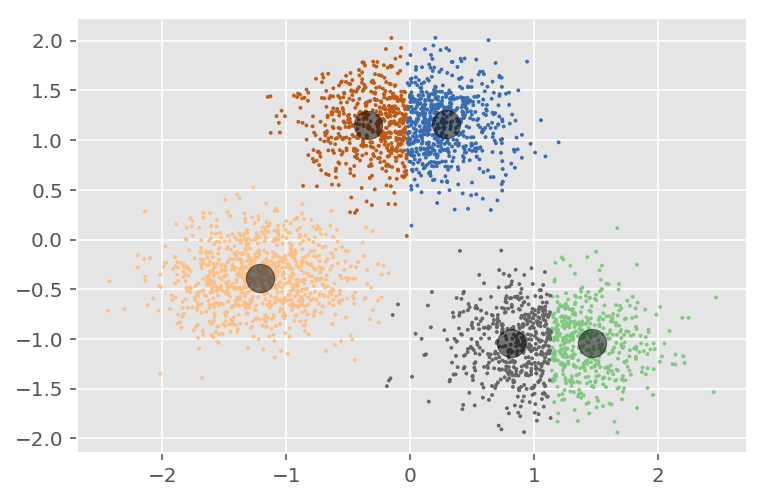

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labels, s=2, cmap='Accent')
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### 4. Determine an appropriate number of clusters based on the SSE.

### 4.1 Elbow method

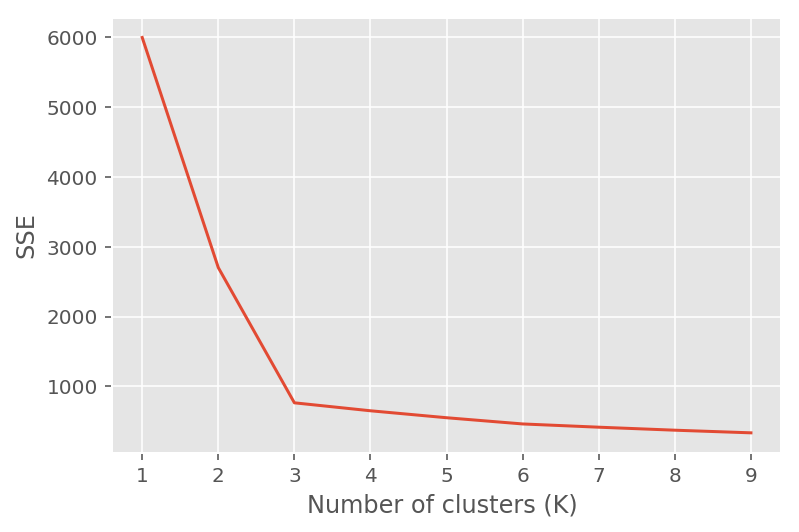

In [6]:
sse = {} 
for k in range(1, 10): 
    kmeans = KMeans(n_clusters=k).fit(X_train_scaled) 
    sse[k] = kmeans.inertia_
plt.figure() 
plt.plot(list(sse.keys()), list(sse.values())) 
plt.xlabel("Number of clusters (K) ") 
plt.ylabel("SSE") 
plt.show()

### 4.2 Silhouette coefficient

In [26]:
from sklearn.metrics import silhouette_score

for k in range(2,15):
    labels = KMeans(n_clusters=k).fit(X_train_scaled).predict(X_train_scaled)
    print("Silhouette Coefficient: %0.3f"
          % silhouette_score(X_train_scaled, labels))

Silhouette Coefficient: 0.552
Silhouette Coefficient: 0.691
Silhouette Coefficient: 0.552
Silhouette Coefficient: 0.432
Silhouette Coefficient: 0.348
Silhouette Coefficient: 0.344
Silhouette Coefficient: 0.340
Silhouette Coefficient: 0.337
Silhouette Coefficient: 0.333
Silhouette Coefficient: 0.334
Silhouette Coefficient: 0.330
Silhouette Coefficient: 0.328
Silhouette Coefficient: 0.323


### 5. Visualize the clustering result of the appropriate number of clusters.

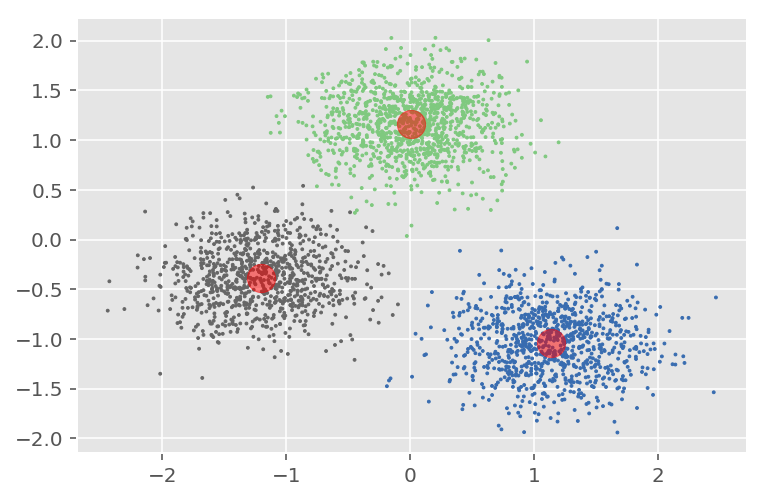

In [30]:
kmeans = KMeans(n_clusters=3).fit(X_train_scaled)
labels = kmeans.predict(X_train_scaled)

import matplotlib.pyplot as plt

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labels, s=2, cmap='Accent')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);